# Vinyl Foam Mastercurve (auto TTS)

Use vinyl foam DMA sweeps across temperature to auto-build a mastercurve and fit models.

**Data:** examples/data/temperature_sweep/foams/foam_dma_*C.csv


In [1]:
# Google Colab compatibility - uncomment if running in Colab
# !pip install -q rheojax
# from google.colab import drive
# drive.mount('/content/drive')


## Setup and Imports

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
%matplotlib inline

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rheojax.models import FractionalMaxwellModel
from rheojax.models import GeneralizedMaxwell
from rheojax.models import HerschelBulkley

from rheojax.core.data import RheoData
from rheojax.core.jax_config import safe_import_jax, verify_float64
from rheojax.pipeline.base import Pipeline
from rheojax.transforms.mastercurve import Mastercurve

jax, jnp = safe_import_jax()
verify_float64()
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore', category=RuntimeWarning)

def r2_complex(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
    ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res / ss_tot)

def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return float(np.mean(np.abs(y_true - y_pred) / np.maximum(np.abs(y_true), 1e-12)) * 100)
import arviz as az


## Load multi-temperature sweeps

In [3]:
DATA_DIR = Path.cwd().parent / 'data' / 'temperature_sweep' / 'foams'
files = sorted(DATA_DIR.glob('foam_dma_*C.csv'))

datasets = []
for fpath in files:
    temp_str = fpath.stem.split('_')[-1].replace('C','')
    temp_c = float(temp_str.replace('--','-') or 0)
    df = pd.read_csv(fpath, sep='	')
    df.columns = df.columns.str.strip()
    omega = df['Angular Frequency'].to_numpy()  # rad/s
    Gp = df['Storage Modulus'].to_numpy()
    Gpp = df['Loss Modulus'].to_numpy()
    datasets.append(RheoData(x=omega, y=Gp + 1j*Gpp, x_units='rad/s', y_units='Pa', domain='oscillation', metadata={'temperature': temp_c + 273.15}))

mc = Mastercurve(reference_temp=298.15, method='wlf', auto_shift=True)
master, shifts = mc.create_mastercurve(datasets, return_shifts=True)
print(f"Temps (C): {[round(d.metadata['temperature']-273.15,1) for d in datasets]}")


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=3.565264s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1130 | final_cost=2.8476e-05 | elapsed=3.565s | final_gradient_norm=1.9965


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=3.232869s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1532 | final_cost=7.3188e-06 | elapsed=3.233s | final_gradient_norm=4.8535


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.814396s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1111 | final_cost=9.1430e-05 | elapsed=1.814s | final_gradient_norm=4.8732


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.188538s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1292 | final_cost=3.4789e-05 | elapsed=2.189s | final_gradient_norm=5.3799


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.286289s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1143 | final_cost=7.3941e-05 | elapsed=2.286s | final_gradient_norm=10.0502


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.965537s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1334 | final_cost=3.5327e-05 | elapsed=2.966s | final_gradient_norm=6.8953


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.212554s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1065 | final_cost=1.8260e-04 | elapsed=2.213s | final_gradient_norm=13.7563


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.843683s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1349 | final_cost=9.6689e-05 | elapsed=2.844s | final_gradient_norm=3.2151


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.502584s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1180 | final_cost=2.2905e-04 | elapsed=2.503s | final_gradient_norm=13.4093


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.207961s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1416 | final_cost=9.3905e-05 | elapsed=2.208s | final_gradient_norm=1.1929


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.986096s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1222 | final_cost=2.7329e-04 | elapsed=1.986s | final_gradient_norm=9.3001


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.231693s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1490 | final_cost=1.1216e-04 | elapsed=2.232s | final_gradient_norm=5.0338


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.644580s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1521 | final_cost=3.2919e-04 | elapsed=2.645s | final_gradient_norm=0.1000


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=3.147678s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1753 | final_cost=1.5159e-04 | elapsed=3.148s | final_gradient_norm=1.0233


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=3.374187s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=2348 | final_cost=5.2371e-05 | elapsed=3.374s | final_gradient_norm=1.7828


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=4.151587s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=2854 | final_cost=1.5372e-05 | elapsed=4.152s | final_gradient_norm=0.0019


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.243033s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=10 | final_cost=6.0207e-06 | elapsed=0.243s | final_gradient_norm=5.9413e-07


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.377455s


INFO:nlsq.least_squares:Convergence reason=`xtol` termination condition is satisfied. | iterations=14 | final_cost=6.0062e-06 | elapsed=0.377s | final_gradient_norm=0.3319


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.343743s


INFO:nlsq.least_squares:Convergence reason=`xtol` termination condition is satisfied. | iterations=12 | final_cost=5.4842e-06 | elapsed=0.344s | final_gradient_norm=6.2835e-05


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.423774s


INFO:nlsq.least_squares:Convergence reason=Both `ftol` and `xtol` termination conditions are satisfied. | iterations=27 | final_cost=4.7763e-06 | elapsed=0.424s | final_gradient_norm=1.0188e-06


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.335767s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=14 | final_cost=1.3786e-05 | elapsed=0.336s | final_gradient_norm=1.9969e-07


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.312757s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=35 | final_cost=6.0402e-06 | elapsed=0.313s | final_gradient_norm=1.6421e-06


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.269500s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=11 | final_cost=2.1041e-05 | elapsed=0.270s | final_gradient_norm=0.0120


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.283797s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=15 | final_cost=6.7411e-06 | elapsed=0.284s | final_gradient_norm=6.8600e-07


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.280098s


INFO:nlsq.least_squares:Convergence reason=Both `ftol` and `xtol` termination conditions are satisfied. | iterations=10 | final_cost=1.9846e-06 | elapsed=0.280s | final_gradient_norm=2.1709e-06


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.271503s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=10 | final_cost=1.8662e-06 | elapsed=0.272s | final_gradient_norm=5.8760e-06


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.196076s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=8 | final_cost=4.9208e-05 | elapsed=0.196s | final_gradient_norm=1.8088e-06


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.361769s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=11 | final_cost=3.2529e-05 | elapsed=0.362s | final_gradient_norm=1.2972e-04


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.291714s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=11 | final_cost=5.5400e-05 | elapsed=0.292s | final_gradient_norm=3.3667e-04


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.309702s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=9 | final_cost=1.4618e-05 | elapsed=0.310s | final_gradient_norm=1.1526e-04


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.340153s


INFO:nlsq.least_squares:Convergence reason=Both `ftol` and `xtol` termination conditions are satisfied. | iterations=15 | final_cost=1.8547e-05 | elapsed=0.340s | final_gradient_norm=4.5522e-06


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.403359s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=18 | final_cost=1.8441e-05 | elapsed=0.403s | final_gradient_norm=0.0024


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.420825s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=20 | final_cost=1.2609e-04 | elapsed=0.421s | final_gradient_norm=4.1160


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.381432s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=26 | final_cost=2.7815e-05 | elapsed=0.381s | final_gradient_norm=0.0632


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.320106s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=24 | final_cost=2.2347e-04 | elapsed=0.320s | final_gradient_norm=0.6340


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.377010s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=25 | final_cost=3.7964e-05 | elapsed=0.377s | final_gradient_norm=5.7970


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.432902s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=27 | final_cost=5.4008e-04 | elapsed=0.433s | final_gradient_norm=34.7795


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.475707s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=33 | final_cost=3.3832e-05 | elapsed=0.476s | final_gradient_norm=0.0434


Temps (C): [-10.0, -15.0, -20.0, -25.0, -30.0, -35.0, -5.0, 0.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 5.0, 60.0]


## Plot raw vs shifted

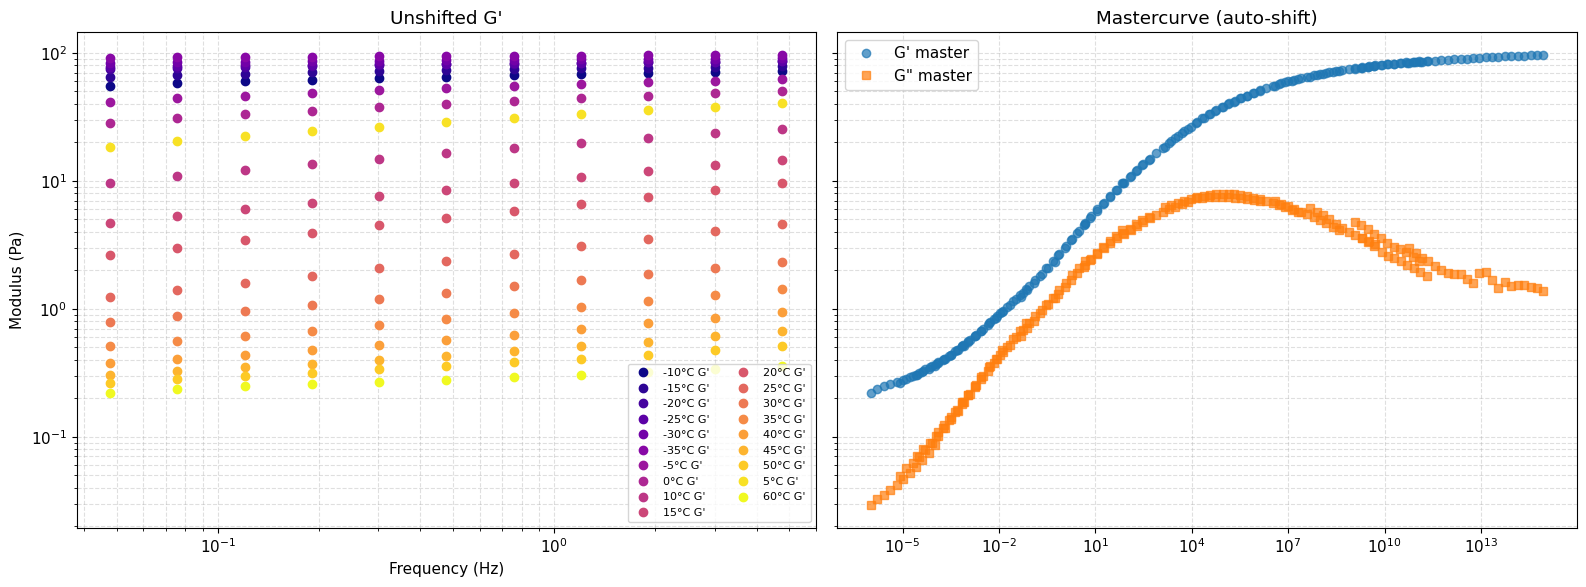

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))
for c, data in zip(colors, datasets):
    temp_c = data.metadata['temperature'] - 273.15
    axes[0].loglog(data.x/(2*np.pi), np.real(data.y), 'o', color=c, label=f"{temp_c:.0f}°C G'")
axes[0].set_title("Unshifted G'")
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Modulus (Pa)')
axes[0].grid(True, which='both', ls='--', alpha=0.4)
axes[0].legend(ncol=2, fontsize=8)

axes[1].loglog(master.x/(2*np.pi), np.real(master.y), 'o', label="G' master", alpha=0.7)
axes[1].loglog(master.x/(2*np.pi), np.imag(master.y), 's', label='G" master', alpha=0.7)
axes[1].set_title('Mastercurve (auto-shift)')
axes[1].grid(True, which='both', ls='--', alpha=0.4)
axes[1].legend()
plt.tight_layout()
display(fig)
plt.close(fig)

## Fit models on mastercurve

In [5]:
omega_master = master.x
G_master = master.y

gm = GeneralizedMaxwell(n_modes=5, modulus_type='tensile')
gm.fit(omega_master, G_master, test_mode='oscillation', use_log_residuals=True)
gm_pred_components = gm.predict(omega_master)
gm_pred = gm_pred_components[:,0] + 1j*gm_pred_components[:,1]
gm_r2 = r2_complex(G_master, gm_pred)

fm_pred = np.full_like(G_master, np.nan)
fm_r2 = np.nan
try:
    fm = FractionalMaxwellModel()
    fm.fit(omega_master, G_master, test_mode='oscillation', use_log_residuals=True)
    fm_pred = fm.predict(omega_master, test_mode='oscillation')
    fm_r2 = r2_complex(G_master, fm_pred)
except Exception as exc:
    print(f"Fractional Maxwell fit failed: {exc}")

print({'gm_r2': gm_r2, 'fm_r2': fm_r2})

INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=11 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.713866s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=37 | final_cost=9251.8535 | elapsed=1.714s | final_gradient_norm=6.0553


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=11 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.631172s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=37 | final_cost=9251.8535 | elapsed=0.631s | final_gradient_norm=6.0553


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=9 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.475655s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=16 | final_cost=9275.7988 | elapsed=1.476s | final_gradient_norm=1.4568e+09


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=7 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.459601s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=18 | final_cost=9379.6023 | elapsed=1.460s | final_gradient_norm=4.7583e+09


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.460837s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=20 | final_cost=9958.4902 | elapsed=1.461s | final_gradient_norm=6.7475e+09


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.596053s


INFO:nlsq.least_squares:Convergence reason=Both `ftol` and `xtol` termination conditions are satisfied. | iterations=4 | final_cost=1.5591e+04 | elapsed=0.596s | final_gradient_norm=0.0491


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=4 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.899490s


INFO:nlsq.least_squares:Convergence reason=`xtol` termination condition is satisfied. | iterations=58 | final_cost=106.1725 | elapsed=1.899s | final_gradient_norm=2.1876e+07


{'gm_r2': 0.9235943069570839, 'fm_r2': -0.39260473049658096}


## Bayesian workflow (NLSQ → best model → NUTS diagnostics)

In [6]:
# Helper functions for workflow
if 'r2_complex' not in globals():
    def r2_complex(y_true, y_pred):
        """Compute R² for complex-valued data."""
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
        ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot

if '_coerce_pred' not in globals():
    def _coerce_pred(pred):
        """Convert 2-column real array to complex if needed."""
        arr = np.asarray(pred)
        if arr.ndim == 2 and arr.shape[1] == 2 and not np.iscomplexobj(arr):
            arr = arr[:, 0] + 1j * arr[:, 1]
        return arr

NUTS_CONFIG = dict(num_chains=1, num_warmup=200, num_samples=500)  # Fast demo mode


In [7]:
def _detect_datasets():
    """Auto-detect datasets from global variables."""
    datasets = []
    if 'G_star' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega, 'y': G_star, 'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)', 'y_label': 'Complex modulus',
        })
    elif 'Gp' in globals() and 'Gpp' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega, 'y': Gp + 1j * Gpp, 'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)', 'y_label': 'Complex modulus',
        })
    if 'master' in globals() and hasattr(master, 'x') and hasattr(master, 'y'):
        test_mode = master.metadata.get('test_mode', 'oscillation') if hasattr(master, 'metadata') else 'oscillation'
        datasets.append({
            'X': master.x, 'y': master.y, 'test_mode': test_mode,
            'x_label': 'Shifted frequency', 'y_label': 'Mastercurve modulus',
        })
    if 't' in globals() and 'G' in globals():
        datasets.append({'X': t, 'y': G, 'test_mode': 'relaxation', 'x_label': 'Time (s)', 'y_label': 'Relaxation modulus'})
    if 't' in globals() and 'E_t' in globals():
        datasets.append({'X': t, 'y': E_t, 'test_mode': 'relaxation', 'x_label': 'Time (s)', 'y_label': 'Relaxation modulus'})
    if 't' in globals() and 'sigma' in globals():
        datasets.append({'X': t, 'y': sigma, 'test_mode': 'relaxation', 'x_label': 'Time (s)', 'y_label': 'Stress (Pa)'})
    if 't' in globals() and 'J' in globals():
        datasets.append({'X': t, 'y': J, 'test_mode': 'creep', 'x_label': 'Time (s)', 'y_label': 'Creep compliance'})
    if 'all_df' in globals() and hasattr(all_df, 'columns') and 'phi' in all_df.columns:
        for phi, frame in all_df.groupby('phi'):
            x_vals = frame.iloc[:, 0].to_numpy()
            y_vals = frame.iloc[:, 1].to_numpy()
            datasets.append({
                'X': x_vals, 'y': y_vals, 'test_mode': 'rotation',
                'x_label': f'Shear rate 1/s (phi={phi})', 'y_label': 'Stress (Pa)', 'label': f'phi={phi}',
            })
    if not datasets:
        raise ValueError('No datasets detected; ensure data variables are defined.')
    return datasets

def _collect_candidate_models():
    """Collect candidate models from global variables."""
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)) and candidates:
        return candidates
    models = []
    for name, obj in globals().items():
        if isinstance(obj, type):
            continue
        if hasattr(obj, 'fit_bayesian') and hasattr(obj, 'predict'):
            models.append((name, obj))
    if not models:
        raise ValueError('No candidate models found; define models before running.')
    return models

datasets = _detect_datasets()
model_entries = _collect_candidate_models()
print(f"Found {len(datasets)} dataset(s) and {len(model_entries)} model(s)")


Found 2 dataset(s) and 2 model(s)


In [8]:
# NLSQ fitting loop - fit all models to all datasets
all_fits = {}  # {dataset_idx: [fit_records]}

for ds_idx, ds in enumerate(datasets):
    fits = []
    for name, model in model_entries:
        fitted_model = model
        fit_kwargs = {'test_mode': ds['test_mode'], 'use_log_residuals': True}
        try:
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except TypeError:
            fit_kwargs.pop('use_log_residuals', None)
            try:
                fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
            except Exception as exc:
                print(f"Skipping {name} due to fit error: {exc}")
                continue
        except Exception as exc:
            print(f"Skipping {name} due to fit error: {exc}")
            continue

        predict_kwargs = {'test_mode': ds['test_mode']} if 'test_mode' in fit_kwargs else {}
        try:
            pred = _coerce_pred(fitted_model.predict(ds['X'], **predict_kwargs))
        except Exception as exc:
            print(f"Skipping {name} due to predict error: {exc}")
            continue

        try:
            r2_val = r2_complex(ds['y'], pred) if np.iscomplexobj(ds['y']) else fitted_model.score(ds['X'], ds['y'])
        except Exception as exc:
            print(f"Skipping {name} due to scoring error: {exc}")
            continue

        fits.append({'name': name, 'model': fitted_model, 'pred': pred, 'r2': float(r2_val)})

    fits.sort(key=lambda rec: rec['r2'], reverse=True)
    all_fits[ds_idx] = fits
    if fits:
        print(f"Dataset {ds_idx} ranking: {[(r['name'], round(r['r2'], 3)) for r in fits]}")
    else:
        print(f"Dataset {ds_idx}: No successful fits")


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.843025s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=17 | final_cost=4.2469e-04 | elapsed=0.843s | final_gradient_norm=6.1914e-07


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.719982s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=17 | final_cost=4.2469e-04 | elapsed=0.720s | final_gradient_norm=6.1914e-07


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.685028s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=14 | final_cost=0.0039 | elapsed=0.685s | final_gradient_norm=35.2506


ERROR:rheojax.core.base:Predict failed
Traceback (most recent call last):
  File "/Users/b80985/Projects/rheojax/rheojax/core/base.py", line 539, in predict
    result = self._predict(X, **kwargs)
TypeError: GeneralizedMaxwell._predict() got an unexpected keyword argument 'test_mode'


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=4 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


Skipping gm due to predict error: GeneralizedMaxwell._predict() got an unexpected keyword argument 'test_mode'


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.838797s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=20 | final_cost=0.1689 | elapsed=0.839s | final_gradient_norm=0.0012


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


Dataset 0 ranking: [('fm', 0.916)]


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.777521s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=43 | final_cost=9958.4852 | elapsed=0.778s | final_gradient_norm=2.1489


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.487661s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=43 | final_cost=9958.4852 | elapsed=0.488s | final_gradient_norm=2.1489


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.279611s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=1.5591e+04 | elapsed=0.280s | final_gradient_norm=0.0501


ERROR:rheojax.core.base:Predict failed
Traceback (most recent call last):
  File "/Users/b80985/Projects/rheojax/rheojax/core/base.py", line 539, in predict
    result = self._predict(X, **kwargs)
TypeError: GeneralizedMaxwell._predict() got an unexpected keyword argument 'test_mode'


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=4 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


Skipping gm due to predict error: GeneralizedMaxwell._predict() got an unexpected keyword argument 'test_mode'


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.655987s


INFO:nlsq.least_squares:Convergence reason=`xtol` termination condition is satisfied. | iterations=58 | final_cost=106.1725 | elapsed=0.656s | final_gradient_norm=2.1876e+07


Dataset 1 ranking: [('fm', -0.393)]


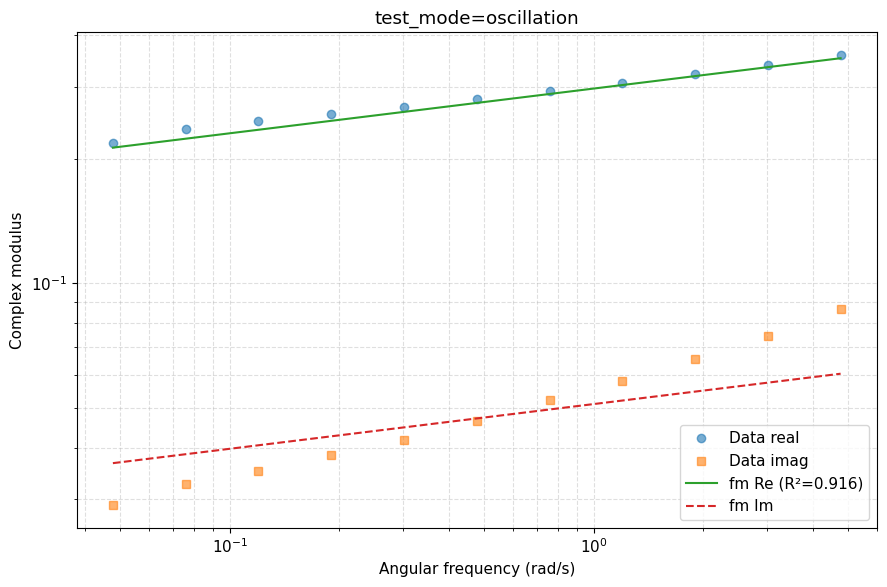

  0%|          | 0/700 [00:00<?, ?it/s]

warmup:   0%|          | 1/700 [00:00<03:34,  3.26it/s, 1 steps of size 1.65e+00. acc. prob=0.00]

warmup:   9%|▊         | 61/700 [00:00<00:03, 192.31it/s, 1023 steps of size 1.49e-03. acc. prob=0.92]

warmup:  14%|█▍        | 97/700 [00:00<00:03, 190.86it/s, 127 steps of size 6.44e-04. acc. prob=0.94] 

warmup:  18%|█▊        | 125/700 [00:00<00:03, 183.65it/s, 255 steps of size 1.74e-03. acc. prob=0.94]

warmup:  21%|██▏       | 149/700 [00:00<00:03, 174.45it/s, 1023 steps of size 1.10e-03. acc. prob=0.95]

warmup:  24%|██▍       | 170/700 [00:01<00:02, 177.07it/s, 1023 steps of size 1.02e-03. acc. prob=0.95]

warmup:  28%|██▊       | 194/700 [00:01<00:02, 191.37it/s, 1023 steps of size 1.88e-03. acc. prob=0.96]

sample:  32%|███▏      | 223/700 [00:01<00:02, 216.33it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  35%|███▌      | 247/700 [00:01<00:02, 221.88it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  39%|███▊      | 271/700 [00:01<00:01, 219.23it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  42%|████▏     | 294/700 [00:01<00:01, 219.96it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  45%|████▌     | 317/700 [00:01<00:01, 221.48it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  49%|████▊     | 340/700 [00:01<00:01, 223.83it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  52%|█████▏    | 363/700 [00:01<00:01, 222.35it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  55%|█████▌    | 386/700 [00:01<00:01, 219.49it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  58%|█████▊    | 409/700 [00:02<00:01, 211.97it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  62%|██████▏   | 431/700 [00:02<00:01, 212.59it/s, 63 steps of size 1.51e-03. acc. prob=0.99]  

sample:  65%|██████▍   | 453/700 [00:02<00:01, 210.47it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  68%|██████▊   | 479/700 [00:02<00:00, 222.73it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  72%|███████▏  | 504/700 [00:02<00:00, 228.89it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  75%|███████▌  | 528/700 [00:02<00:00, 230.73it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  79%|███████▉  | 552/700 [00:02<00:00, 232.92it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  82%|████████▏ | 576/700 [00:02<00:00, 233.82it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  86%|████████▌ | 600/700 [00:02<00:00, 221.70it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  89%|████████▉ | 623/700 [00:03<00:00, 197.31it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  92%|█████████▏| 644/700 [00:03<00:00, 194.72it/s, 7 steps of size 1.51e-03. acc. prob=0.99]   

sample:  95%|█████████▍| 664/700 [00:03<00:00, 192.41it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample:  98%|█████████▊| 685/700 [00:03<00:00, 195.46it/s, 1023 steps of size 1.51e-03. acc. prob=0.99]

sample: 100%|██████████| 700/700 [00:03<00:00, 199.75it/s, 815 steps of size 1.51e-03. acc. prob=0.99] 

Dataset 0: Bayesian inference complete for fm


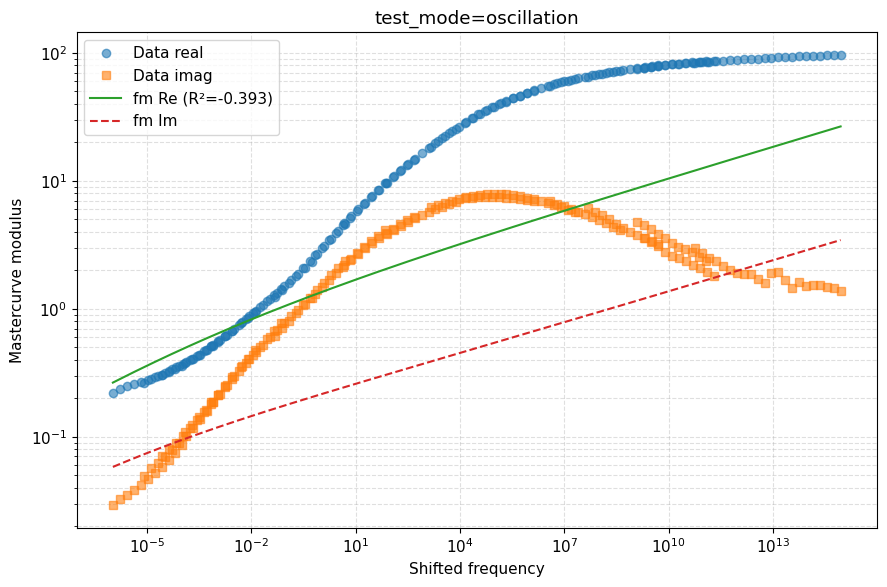

  0%|          | 0/700 [00:00<?, ?it/s]

warmup:   0%|          | 1/700 [00:00<03:01,  3.84it/s, 1 steps of size 1.65e+00. acc. prob=0.00]

warmup:  10%|▉         | 69/700 [00:00<00:02, 232.97it/s, 1023 steps of size 2.08e-03. acc. prob=0.93]

warmup:  15%|█▌        | 105/700 [00:00<00:03, 191.08it/s, 63 steps of size 2.09e-03. acc. prob=0.94] 

warmup:  19%|█▉        | 132/700 [00:00<00:02, 203.37it/s, 255 steps of size 9.68e-04. acc. prob=0.95]

warmup:  23%|██▎       | 158/700 [00:01<00:04, 119.93it/s, 1023 steps of size 2.07e-04. acc. prob=0.94]

warmup:  25%|██▌       | 177/700 [00:01<00:05, 90.43it/s, 1023 steps of size 4.22e-04. acc. prob=0.95] 

warmup:  27%|██▋       | 191/700 [00:01<00:06, 80.96it/s, 1023 steps of size 5.98e-04. acc. prob=0.95]

sample:  29%|██▉       | 203/700 [00:01<00:06, 82.00it/s, 383 steps of size 4.98e-04. acc. prob=1.00] 

sample:  31%|███       | 214/700 [00:02<00:06, 73.09it/s, 255 steps of size 4.98e-04. acc. prob=0.99]

sample:  32%|███▏      | 223/700 [00:02<00:06, 73.27it/s, 751 steps of size 4.98e-04. acc. prob=0.99]

sample:  33%|███▎      | 232/700 [00:02<00:07, 59.62it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  34%|███▍      | 239/700 [00:02<00:07, 61.14it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  36%|███▌      | 249/700 [00:02<00:06, 68.20it/s, 255 steps of size 4.98e-04. acc. prob=0.99] 

sample:  37%|███▋      | 257/700 [00:02<00:06, 69.25it/s, 127 steps of size 4.98e-04. acc. prob=0.99]

sample:  38%|███▊      | 266/700 [00:02<00:06, 71.21it/s, 511 steps of size 4.98e-04. acc. prob=0.99]

sample:  39%|███▉      | 274/700 [00:03<00:06, 69.27it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  40%|████      | 282/700 [00:03<00:06, 65.61it/s, 511 steps of size 4.98e-04. acc. prob=0.99] 

sample:  41%|████▏     | 289/700 [00:03<00:07, 57.75it/s, 511 steps of size 4.98e-04. acc. prob=0.99]

sample:  42%|████▏     | 296/700 [00:03<00:07, 55.92it/s, 639 steps of size 4.98e-04. acc. prob=0.99]

sample:  43%|████▎     | 302/700 [00:03<00:07, 55.04it/s, 559 steps of size 4.98e-04. acc. prob=0.99]

sample:  44%|████▍     | 308/700 [00:03<00:07, 55.00it/s, 255 steps of size 4.98e-04. acc. prob=0.99]

sample:  45%|████▍     | 314/700 [00:03<00:08, 47.28it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  46%|████▌     | 321/700 [00:04<00:07, 50.61it/s, 767 steps of size 4.98e-04. acc. prob=0.99] 

sample:  47%|████▋     | 328/700 [00:04<00:07, 52.61it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  48%|████▊     | 335/700 [00:04<00:06, 55.92it/s, 511 steps of size 4.98e-04. acc. prob=0.99] 

sample:  49%|████▉     | 342/700 [00:04<00:06, 59.28it/s, 255 steps of size 4.98e-04. acc. prob=0.99]

sample:  50%|████▉     | 349/700 [00:04<00:06, 55.90it/s, 511 steps of size 4.98e-04. acc. prob=0.99]

sample:  51%|█████     | 355/700 [00:04<00:06, 56.78it/s, 255 steps of size 4.98e-04. acc. prob=0.99]

sample:  52%|█████▏    | 361/700 [00:04<00:06, 54.64it/s, 255 steps of size 4.98e-04. acc. prob=0.99]

sample:  52%|█████▏    | 367/700 [00:04<00:06, 52.69it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  53%|█████▎    | 374/700 [00:04<00:06, 54.31it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  55%|█████▍    | 383/700 [00:05<00:05, 60.56it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  56%|█████▌    | 390/700 [00:05<00:05, 58.77it/s, 463 steps of size 4.98e-04. acc. prob=0.99] 

sample:  57%|█████▋    | 396/700 [00:05<00:05, 56.55it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  57%|█████▋    | 402/700 [00:05<00:06, 46.71it/s, 511 steps of size 4.98e-04. acc. prob=0.99] 

sample:  59%|█████▉    | 413/700 [00:05<00:04, 58.58it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  60%|██████    | 420/700 [00:05<00:04, 60.31it/s, 63 steps of size 4.98e-04. acc. prob=0.99]  

sample:  62%|██████▏   | 432/700 [00:05<00:03, 71.11it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  63%|██████▎   | 440/700 [00:05<00:03, 68.41it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  64%|██████▍   | 447/700 [00:06<00:03, 65.22it/s, 191 steps of size 4.98e-04. acc. prob=0.99] 

sample:  65%|██████▌   | 456/700 [00:06<00:03, 68.25it/s, 495 steps of size 4.98e-04. acc. prob=0.99]

sample:  66%|██████▌   | 463/700 [00:06<00:03, 60.06it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  67%|██████▋   | 470/700 [00:06<00:03, 58.92it/s, 255 steps of size 4.98e-04. acc. prob=0.99] 

sample:  68%|██████▊   | 477/700 [00:06<00:04, 51.37it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  69%|██████▉   | 483/700 [00:06<00:04, 50.90it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  70%|███████   | 490/700 [00:06<00:03, 54.71it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  71%|███████   | 496/700 [00:07<00:03, 54.82it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  72%|███████▏  | 505/700 [00:07<00:03, 61.58it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  73%|███████▎  | 513/700 [00:07<00:02, 63.38it/s, 767 steps of size 4.98e-04. acc. prob=0.99] 

sample:  74%|███████▍  | 520/700 [00:07<00:03, 56.26it/s, 511 steps of size 4.98e-04. acc. prob=0.99]

sample:  75%|███████▌  | 527/700 [00:07<00:03, 56.24it/s, 767 steps of size 4.98e-04. acc. prob=0.99]

sample:  76%|███████▋  | 535/700 [00:07<00:02, 60.11it/s, 767 steps of size 4.98e-04. acc. prob=0.99]

sample:  78%|███████▊  | 543/700 [00:07<00:02, 62.49it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  79%|███████▊  | 550/700 [00:07<00:02, 62.46it/s, 767 steps of size 4.98e-04. acc. prob=0.99] 

sample:  80%|███████▉  | 558/700 [00:07<00:02, 63.08it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  81%|████████  | 565/700 [00:08<00:02, 54.58it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  82%|████████▏ | 571/700 [00:08<00:02, 52.62it/s, 255 steps of size 4.98e-04. acc. prob=0.99] 

sample:  82%|████████▏ | 577/700 [00:08<00:02, 53.83it/s, 511 steps of size 4.98e-04. acc. prob=0.99]

sample:  83%|████████▎ | 584/700 [00:08<00:02, 56.58it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  85%|████████▌ | 596/700 [00:08<00:01, 72.09it/s, 511 steps of size 4.98e-04. acc. prob=0.99] 

sample:  86%|████████▋ | 604/700 [00:08<00:01, 66.74it/s, 255 steps of size 4.98e-04. acc. prob=0.99]

sample:  87%|████████▋ | 611/700 [00:08<00:01, 65.44it/s, 535 steps of size 4.98e-04. acc. prob=0.99]

sample:  88%|████████▊ | 619/700 [00:08<00:01, 68.94it/s, 311 steps of size 4.98e-04. acc. prob=0.99]

sample:  90%|████████▉ | 627/700 [00:09<00:01, 65.04it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  91%|█████████ | 634/700 [00:09<00:01, 63.21it/s, 327 steps of size 4.98e-04. acc. prob=0.99] 

sample:  92%|█████████▏| 641/700 [00:09<00:00, 62.76it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  93%|█████████▎| 648/700 [00:09<00:00, 64.42it/s, 127 steps of size 4.98e-04. acc. prob=0.99] 

sample:  94%|█████████▎| 655/700 [00:09<00:00, 59.17it/s, 511 steps of size 4.98e-04. acc. prob=0.99]

sample:  95%|█████████▍| 663/700 [00:09<00:00, 64.24it/s, 423 steps of size 4.98e-04. acc. prob=0.99]

sample:  96%|█████████▌| 673/700 [00:09<00:00, 72.04it/s, 511 steps of size 4.98e-04. acc. prob=0.99]

sample:  97%|█████████▋| 681/700 [00:09<00:00, 63.38it/s, 1023 steps of size 4.98e-04. acc. prob=0.99]

sample:  98%|█████████▊| 688/700 [00:10<00:00, 56.53it/s, 687 steps of size 4.98e-04. acc. prob=0.99] 

sample: 100%|█████████▉| 698/700 [00:10<00:00, 64.96it/s, 511 steps of size 4.98e-04. acc. prob=0.99]

sample: 100%|██████████| 700/700 [00:10<00:00, 68.19it/s, 327 steps of size 4.98e-04. acc. prob=0.99]

Dataset 1: Bayesian inference complete for fm


In [9]:
# Bayesian inference on best model per dataset
def _plot_data_and_fits(ds, fits):
    """Plot data with model fits overlay."""
    fig, ax = plt.subplots(figsize=(9, 6))
    X_plot, y_true = ds['X'], ds['y']
    if np.iscomplexobj(y_true):
        x_axis = X_plot / (2 * np.pi) if ds['test_mode'] == 'oscillation' else X_plot
        ax.loglog(x_axis, np.real(y_true), 'o', label="Data real", alpha=0.6)
        ax.loglog(x_axis, np.imag(y_true), 's', label="Data imag", alpha=0.6)
        for rec in fits:
            pred = _coerce_pred(rec['pred'])
            ax.loglog(x_axis, np.real(pred), '-', label=f"{rec['name']} Re (R²={rec['r2']:.3f})")
            ax.loglog(x_axis, np.imag(pred), '--', label=f"{rec['name']} Im")
    else:
        ax.loglog(X_plot, y_true, 'o', label='Data', alpha=0.6)
        for rec in fits:
            ax.loglog(X_plot, rec['pred'], '-', label=f"{rec['name']} (R²={rec['r2']:.3f})")
    ax.set_xlabel(ds.get('x_label', 'X'))
    ax.set_ylabel(ds.get('y_label', 'Response'))
    ax.set_title(ds.get('label', f"test_mode={ds['test_mode']}"))
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)

bayes_results = {}  # {dataset_idx: inference_data}

for ds_idx, ds in enumerate(datasets):
    fits = all_fits.get(ds_idx, [])
    if not fits:
        continue

    best = fits[0]
    _plot_data_and_fits(ds, fits)

    try:
        bayes_result = best['model'].fit_bayesian(
            ds['X'], ds['y'], **NUTS_CONFIG, test_mode=ds['test_mode'],
        )
        bayes_results[ds_idx] = bayes_result.to_inference_data()
        print(f"Dataset {ds_idx}: Bayesian inference complete for {best['name']}")
    except Exception as exc:
        print(f"Dataset {ds_idx}: Bayesian step failed for {best['name']}: {exc}")


In [10]:
# ArviZ diagnostics for Bayesian results
def _plot_diagnostics(idata):
    """Generate ArviZ diagnostic plots."""
    diag_plotters = [
        ('pair', lambda: az.plot_pair(idata, divergences=True, kind='kde')),
        ('forest', lambda: az.plot_forest(idata, combined=True)),
        ('energy', lambda: az.plot_energy(idata)),
        ('autocorr', lambda: az.plot_autocorr(idata)),
        ('rank', lambda: az.plot_rank(idata)),
        ('ess', lambda: az.plot_ess(idata, kind='evolution')),
    ]
    for name, plot_fn in diag_plotters:
        try:
            obj = plot_fn()
            plt.tight_layout()
            display(obj)
            plt.close('all')
        except Exception as exc:
            print(f"Skipping {name} plot: {exc}")

for ds_idx, idata in bayes_results.items():
    print(f"\n--- Diagnostics for dataset {ds_idx} ---")
    _plot_diagnostics(idata)



--- Diagnostics for dataset 0 ---


array([[<Axes: ylabel='beta'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='c1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma_imag'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='sigma_real'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: xlabel='alpha', ylabel='tau'>, <Axes: xlabel='beta'>,
        <Axes: xlabel='c1'>, <Axes: xlabel='sigma_imag'>,
        <Axes: xlabel='sigma_real'>]], dtype=object)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot: 'Dataset' object has no attribute 'energy'


array([[<Axes: title={'center': 'alpha\n0'}>,
        <Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'c1\n0'}>],
       [<Axes: title={'center': 'sigma_imag\n0'}>,
        <Axes: title={'center': 'sigma_real\n0'}>,
        <Axes: title={'center': 'tau\n0'}>]], dtype=object)

array([[<Axes: title={'center': 'alpha'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'beta'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'c1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

array([[<Axes: title={'center': 'alpha'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'beta'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'c1'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau'}, xlabel='Total number of draws', ylabel='ESS'>]],
      dtype=object)


--- Diagnostics for dataset 1 ---


array([[<Axes: ylabel='beta'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='c1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma_imag'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='sigma_real'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: xlabel='alpha', ylabel='tau'>, <Axes: xlabel='beta'>,
        <Axes: xlabel='c1'>, <Axes: xlabel='sigma_imag'>,
        <Axes: xlabel='sigma_real'>]], dtype=object)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot: 'Dataset' object has no attribute 'energy'


array([[<Axes: title={'center': 'alpha\n0'}>,
        <Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'c1\n0'}>],
       [<Axes: title={'center': 'sigma_imag\n0'}>,
        <Axes: title={'center': 'sigma_real\n0'}>,
        <Axes: title={'center': 'tau\n0'}>]], dtype=object)

array([[<Axes: title={'center': 'alpha'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'beta'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'c1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

array([[<Axes: title={'center': 'alpha'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'beta'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'c1'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau'}, xlabel='Total number of draws', ylabel='ESS'>]],
      dtype=object)